In [3]:
# importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

Creating a random 4 by 4 matrix. 

In [4]:
randMat = np.mat(np.random.rand(4,4))
print(randMat)

[[ 0.42307362  0.73982577  0.19498292  0.09203663]
 [ 0.52860503  0.30469265  0.7687214   0.00359291]
 [ 0.88849332  0.18811586  0.94985822  0.57339951]
 [ 0.04887285  0.9885701   0.07645937  0.06812972]]


In [5]:
# checking the property: A * inv(A) = Identity
print(randMat * randMat.I)

[[  1.00000000e+00   0.00000000e+00  -2.77555756e-17   5.55111512e-17]
 [ -5.37764278e-17   1.00000000e+00  -7.63278329e-17   3.30464822e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   1.11022302e-16]
 [ -1.38777878e-17   0.00000000e+00  -1.38777878e-17   1.00000000e+00]]


In [32]:
# k - NN
def createDataSet():
    group  = np.array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.0], [0, 0.1], [-1.0, 1.0]])
    labels = ['B', 'A', 'B', 'B', 'B']
    return group, labels

In [33]:
# utility function
# returns frequency of element in list
def find_freq(item, list_labels):
    count = 0
    for index in range(len(list_labels)):
        if(list_labels[index] == item):
            count += 1
    return count

['B', 'A', 'B', 'B', 'B']


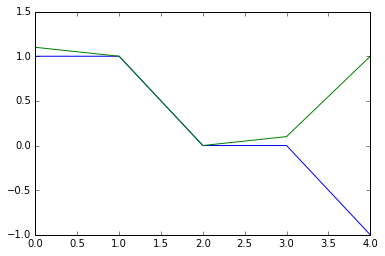

In [34]:
group, labels = createDataSet()
# labels = [float(x) for x in labels]

print(labels)
plt.plot(group)

In [35]:
def classify0(unknown, data, labels, k):
    # iterate over all samples
    # examples: [A_inx, B_inx] and [A_data, B_data]
    # sqrt((A_data - A_inx)**2 + (B_data - B_inx)**2)
    features_len = data.shape[1]
#     for i in range(data.shape[0]):
#         dffMat = 0
    dffMat = [[sqrt((x[0] - unknown[0]) ** 2 + (x[1] - unknown[1]) ** 2)] for x in data]
#     print(dffMat)
    
    for i in range(len(dffMat)):
        dffMat[i].append(labels[i])
    
#     print(dffMat)
    # sort dffMat
    
    minimum = 100
    kNN_list = []
    
    for j in range(k):
        for i in range(len(dffMat)):
            if(dffMat[i][0] < minimum):
                minimum = dffMat[i][0]
                index = i
        dffMat[index][0] = 1000
        kNN_list.append([minimum, index])
        minimum = 1000
        
    labels_list = []
    
    for point in kNN_list:
        labels_list.append(labels[point[1]])
    
    if(k == 2 and labels_list[0] != labels_list[1]):
        print("Can not be predicted")
        return kNN_list, labels_list
    else:
        count = {}
        set_labels = set(labels_list)
        for unique_label in set_labels:
            count[unique_label] = find_freq(unique_label, labels_list)
        print("dict: ", count)
#         for i in range(len(labels_list)):
#             pt = labels_list[i]
#             count[pt] = 1
#             for j in range(i, len(labels_list)):
#                 if(pt == labels_list[j]):
#                     count[pt] += 1
        # print(count)
        # print(max(count))
        maximum = 0.0
        for i in count.keys():
            if(maximum < count[i]):
                maximum = count[i]
                index = i
        if(maximum == 0)
#         print(maximum)
        return kNN_list, labels_list, index

In [36]:
classify0([1.1, 1], group, labels, 2)

Can not be predicted


([[0.10000000000000009, 1], [0.14142135623730964, 0]], ['A', 'B'])